# A View of Air Travel Safety From NTSB Aviation Accident Data

---

### Table of Content

1. Business Objectives
2. Data Understanding  
  2.1 Read NTSB aviation accident data  
  2.2 Check data size  
  2.3 Check field names  
  2.4 Check sample data  
3. Data Preparation  
  3.1 Which fields have missing data?  
  3.2 Handle missing data 
  3.3 Verify data quality  
  3.4 Clean data  
  3.5 Keep relevant data field  
  3.6 Country counts  
  3.7 Numerical fields statistics  
  3.8 Handel categorical variables  
4. Statistic Analysis  
  4.1 When is the most dangerous time during each flight phases?  
  4.2 Is airplane more safe or less safe during the last few decades?  
  4.3 Which airplane has the highest fatal accidents?  
5. Deployment  
6. Conclusion  

Addionally: [Medium Article](https://medium.com/@qiuxinjie/3-things-you-need-to-know-about-the-of-air-travel-safety-43cddf33cd23)

---

### Business Objectives


Safety is a concern for every air traveller. They may wonder the following questions:

1. When is the most dangerous time during each flight phases?
2. Is airplane more safe or less safe during the last few decades?
3. Which airplane has the highest fatal accidents?

National Transportation Safety Board (NTSB) provides aviation accident data.

Let's first load all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Understanding 

When it comes to aviation accident investigation, the [National Transportation Safety Board (NTSB)](http://www.ntsb.gov/) is the authority. The NTSB is an investigative agency responsible for civil transportation accident investigation. When requested, the NTSB will assist foreign governments with accident investigation. Therefore, I used data from NTSB database, to take a closer look at these questions. 

The NTSB make its data vailable to the public through its [database website](https://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx). The data used in this analysis is not directly from NTSB though, it is from the [Kaggle NTSB aviation accident dataset](https://www.kaggle.com/khsamaha/aviation-accident-database-synopses) (upto Dec 2017) uploaded by [Kheirallah Samaha](https://www.kaggle.com/khsamaha).This dataset contains 81,013 accidents/incidents from 178 countries, with majority (76,188) in the United States. There were 31 field as a part of the data.

#### 1. Read NTSB aviation accident data

In [2]:
df = pd.read_csv('./AviationData.csv', engine='python')

#### 2. Check data size

In [3]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print("there are {} rows in the dataset!".format(num_rows))
print("there are {} columns in the dataset!".format(num_cols))

there are 81013 rows in the dataset!
there are 31 columns in the dataset!


#### 3. Check field names

In [4]:
df.columns.tolist()

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.Damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.Flight',
 'Air.Carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.Phase.of.Flight',
 'Report.Status',
 'Publication.Date']

#### 4. Check sample data
Look at the first few samples in the dataset to get a feeling of how the data looks like

In [5]:
df.head().T

0  \
Event.Id                           20171230X01728   
Investigation.Type                       Accident   
Accident.Number                        WPR18LA058   
Event.Date                             2017-12-29   
Location                       San Bernardino, CA   
Country                             United States   
Latitude                                  34.0917   
Longitude                                -117.248   
Airport.Code                                  SBD   
Airport.Name                  SAN BERNARDINO INTL   
Injury.Severity                         Non-Fatal   
Aircraft.Damage                       Substantial   
Aircraft.Category                        Airplane   
Registration.Number                        N222AT   
Make                                       CESSNA   
Model                                         210   
Amateur.Built                                  No   
Number.of.Engines                               1   
Engine.Type                         Reciprocating   
FAR.Description         Part 91: General Aviation   
Schedule                                      NaN   
Purpose.of.Flight                        Personal   
Air.Carrier                                   NaN   
Total.Fatal.Injuries                          NaN   
Total.Serious.Injuries                        NaN   
Total.Minor.Injuries                          NaN   
Total.Uninjured                                 1   
Weather.Condition                             VMC   
Broad.Phase.of.Flight                     LANDING   
Report.Status                         Preliminary   
Publication.Date                       2018-01-08   

                                                  1  \
Event.Id                             20171229X23639   
Investigation.Type                         Accident   
Accident.Number                          GAA18CA094   
Event.Date                               2017-12-28   
Location                              Spearfish, SD   
Country                               United States   
Latitude                                    44.4847   
Longitude                                  -103.788   
Airport.Code                                    SPF   
Airport.Name            BLACK HILLS-CLYDE ICE FIELD   
Injury.Severity                           Non-Fatal   
Aircraft.Damage                         Substantial   
Aircraft.Category                          Airplane   
Registration.Number                           N11KX   
Make                                          PIPER   
Model                                    PA 32-301T   
Amateur.Built                                    No   
Number.of.Engines                                 1   
Engine.Type                                     NaN   
FAR.Description           Part 91: General Aviation   
Schedule                                        NaN   
Purpose.of.Flight                          Personal   
Air.Carrier                                     NaN   
Total.Fatal.Injuries                            NaN   
Total.Serious.Injuries                          NaN   
Total.Minor.Injuries                            NaN   
Total.Uninjured                                   1   
Weather.Condition                               VMC   
Broad.Phase.of.Flight                           NaN   
Report.Status                           Preliminary   
Publication.Date                         2018-01-09   

                                                2                          3  \
Event.Id                           20180102X10253             20171227X12320   
Investigation.Type                       Accident                   Accident   
Accident.Number                        CEN18LA064                 GAA18CA096   
Event.Date                             2017-12-28                 2017-12-27   
Location                             Paulding, OH             Upper Lake, CA   
Country                             United States              United States   
Latitude                      

### Data Preparation

#### 1. Which fields have missing data?

In [6]:
df.isnull().mean()*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.093812
Country                    0.625825
Latitude                  66.290595
Longitude                 66.301705
Airport.Code              43.518941
Airport.Name              40.086159
Injury.Severity            0.000000
Aircraft.Damage            3.095799
Aircraft.Category         70.097392
Registration.Number        4.115389
Make                       0.090109
Model                      0.125906
Amateur.Built              0.751731
Number.of.Engines          5.355931
Engine.Type                4.556059
FAR.Description           70.480046
Schedule                  85.646748
Purpose.of.Flight          5.216447
Air.Carrier               95.050177
Total.Fatal.Injuries      30.467950
Total.Serious.Injuries    33.390937
Total.Minor.Injuries      31.981287
Total.Uninjured           16.129510
Weather.Condition          2

About 66% data don't have Latitude/Longitude informaiton, about 40% data don't have airport information.


#### 2. Handle missing data

For Fatal.Injuries, Serious.Injuries, Minor.Injuries, Uninjured, fill missing data with 0. For Number.of.Engines, fill missing data with 1 (the majority of airplanes have only one engine)

In [7]:
df.fillna(value={'Total.Fatal.Injuries': 0,
                'Total.Serious.Injuries': 0,
                'Total.Minor.Injuries': 0,
                'Total.Uninjured': 0,
                'Number.of.Engines': 1}, 
          inplace = True)

#### 3. Verify data quality
Verify data quality by spot checking.

First look at the September 11 attacks. 4 airplanes crashed on that day.

In [8]:
df.loc[df['Event.Date']=='2001-09-11'].T

29526              29527  \
Event.Id                 20020123X00106     20020123X00105   
Investigation.Type             Accident           Accident   
Accident.Number              DCA01MA065         DCA01MA064   
Event.Date                   2001-09-11         2001-09-11   
Location                Shanksville, PA      Arlington, VA   
Country                   United States      United States   
Latitude                            NaN                NaN   
Longitude                           NaN                NaN   
Airport.Code                        NaN                NaN   
Airport.Name                        NaN                NaN   
Injury.Severity               Fatal(44)          Fatal(64)   
Aircraft.Damage               Destroyed          Destroyed   
Aircraft.Category                   NaN                NaN   
Registration.Number              N591UA             N644AA   
Make                             Boeing             Boeing   
Model                               757            757-200   
Amateur.Built                        No                 No   
Number.of.Engines                     1                  1   
Engine.Type                         NaN                NaN   
FAR.Description                     NaN                NaN   
Schedule                           SCHD               SCHD   
Purpose.of.Flight                   NaN                NaN   
Air.Carrier             United Airlines  American Airlines   
Total.Fatal.Injuries                 44                 64   
Total.Serious.Injuries                0                  0   
Total.Minor.Injuries                  0                  0   
Total.Uninjured                       0                  0   
Weather.Condition                   NaN                NaN   
Broad.Phase.of.Flight            CRUISE             CRUISE   
Report.Status            Probable Cause     Probable Cause   
Publication.Date             2006-03-07         2006-03-07   

                                        29528              29529  
Event.Id                       20020123X00104     20020123X00103  
Investigation.Type                   Accident           Accident  
Accident.Number                    DCA01MA063         DCA01MA060  
Event.Date                         2001-09-11         2001-09-11  
Location                    New York City, NY  New York City, NY  
Country                         United States      United States  
Latitude                                  NaN                NaN  
Longitude                                 NaN                NaN  
Airport.Code                              NaN                NaN  
Airport.Name                              NaN                NaN  
Injury.Severity                     Fatal(65)          Fatal(92)  
Aircraft.Damage                     Destroyed          Destroyed  
Aircraft.Category                    Airplane                NaN  
Registration.Number                    N612UA             N334AA  
Make                                   Boeing             Boeing  
Model                               767-200ER          767-200ER  
Amateur.Built                              No                 No  
Number.of.Engines                           2                  2  
Engine.Type                         Turbo Fan          Turbo Fan  
FAR.Description         Part 121: Air Carrier                NaN  
Schedule                                 SCHD               SCHD  
Purpose.of.Flight                         NaN                NaN  
Air.Carrier                   United Airlines  American Airlines  
Total.Fatal.Injuries                       65                 92  
Total.Serious.Injuries                      0                  0  
Total.Minor.Injuries                        0                  0  
Total.Uninjured                             0                  0  
Weather.Condition                         NaN                NaN  
Broad.Phase.of.Flight                  CRUISE             CRUISE  
Report.Status                  Probable

Then list accidents with more than 250 fatalities:

In [9]:
df.loc[df['Total.Fatal.Injuries']>250].T

5420                           29244  \
Event.Id                      20140718X92314                 20011130X02321   
Investigation.Type                  Accident                       Accident   
Accident.Number                   DCA14RA127                     DCA02MA001   
Event.Date                        2014-07-17                     2001-11-12   
Location                    Hrabove, Ukraine               Belle Harbor, NY   
Country                              Ukraine                  United States   
Latitude                                 NaN                            NaN   
Longitude                                NaN                            NaN   
Airport.Code                             NaN                            JFK   
Airport.Name                             NaN  John F. Kennedy International   
Injury.Severity                   Fatal(295)                     Fatal(265)   
Aircraft.Damage                    Destroyed                      Destroyed   
Aircraft.Category                   Airplane                            NaN   
Registration.Number                      NaN                         N14053   
Make                                  BOEING               Airbus Industrie   
Model                              777 - 206                    A300B4-605R   
Amateur.Built                             No                             No   
Number.of.Engines                          1                              2   
Engine.Type                              NaN                      Turbo Fan   
FAR.Description         Non-U.S., Commercial                            NaN   
Schedule                                SCHD                           SCHD   
Purpose.of.Flight                        NaN                            NaN   
Air.Carrier                              NaN                            NaN   
Total.Fatal.Injuries                     295                            265   
Total.Serious.Injuries                     0                              0   
Total.Minor.Injuries                       0                              0   
Total.Uninjured                            0                              0   
Weather.Condition                        NaN                            VMC   
Broad.Phase.of.Flight                    NaN                        TAKEOFF   
Report.Status                        Foreign                 Probable Cause   
Publication.Date                         NaN                     2005-04-14   

                                   40130             40131  \
Event.Id                  20020124X00116    20020124X00116   
Investigation.Type              Accident          Accident   
Accident.Number              DCA97WA007B       DCA97WA007A   
Event.Date                    1996-11-12        1996-11-12   
Location                New Delhi, India  New Delhi, India   
Country                            India             India   
Latitude                             NaN               NaN   
Longitude                            NaN               NaN   
Airport.Code                         NaN               NaN   
Airport.Name                         NaN               NaN   
Injury.Severity               Fatal(349)        Fatal(349)   
Aircraft.Damage                      NaN               NaN   
Aircraft.Category                    NaN               NaN   
Registration.Number                  NaN               NaN   
Make                             Tupolev            Boeing   
Model                             TU-154           747-168   
Amateur.Built                         No                No   
Number.of.Engines                      1                 1   
Engine.Type                          NaN               NaN   
FAR.Description                      NaN               NaN   
Schedule                            SCHD              SCHD   
Purpose.of.Flight                    NaN               NaN   
Air.Carrier                          NaN               NaN   
Total.Fatal.Injuries  

There are two accient events having 349 fatality. It turns out these were the world's deadliest 1996 mid-air collision: Charkhi Dadri mid-air collision. The crash killed all 349 people on board both planes. 

#### 4. Clean data

Both airplanes have their entries in the NTSB dataset, but both listed 349 fatals in their respective entries. Saudi Arabian Airlines Boeing 747 had 312 Fatalities, Kazakhstan Airlines has 37 fatalities. Need to make correction to the falality count for both entries in the dataset.

In [10]:
df.loc[df['Accident.Number']=='DCA97WA007A','Total.Fatal.Injuries'] = 312
df.loc[df['Accident.Number']=='DCA97WA007B','Total.Fatal.Injuries'] = 37

In [11]:
df.loc[df['Total.Fatal.Injuries']>250].T

5420                           29244  \
Event.Id                      20140718X92314                 20011130X02321   
Investigation.Type                  Accident                       Accident   
Accident.Number                   DCA14RA127                     DCA02MA001   
Event.Date                        2014-07-17                     2001-11-12   
Location                    Hrabove, Ukraine               Belle Harbor, NY   
Country                              Ukraine                  United States   
Latitude                                 NaN                            NaN   
Longitude                                NaN                            NaN   
Airport.Code                             NaN                            JFK   
Airport.Name                             NaN  John F. Kennedy International   
Injury.Severity                   Fatal(295)                     Fatal(265)   
Aircraft.Damage                    Destroyed                      Destroyed   
Aircraft.Category                   Airplane                            NaN   
Registration.Number                      NaN                         N14053   
Make                                  BOEING               Airbus Industrie   
Model                              777 - 206                    A300B4-605R   
Amateur.Built                             No                             No   
Number.of.Engines                          1                              2   
Engine.Type                              NaN                      Turbo Fan   
FAR.Description         Non-U.S., Commercial                            NaN   
Schedule                                SCHD                           SCHD   
Purpose.of.Flight                        NaN                            NaN   
Air.Carrier                              NaN                            NaN   
Total.Fatal.Injuries                     295                            265   
Total.Serious.Injuries                     0                              0   
Total.Minor.Injuries                       0                              0   
Total.Uninjured                            0                              0   
Weather.Condition                        NaN                            VMC   
Broad.Phase.of.Flight                    NaN                        TAKEOFF   
Report.Status                        Foreign                 Probable Cause   
Publication.Date                         NaN                     2005-04-14   

                                   40131                      58931  \
Event.Id                  20020124X00116             20001213X27403   
Investigation.Type              Accident                   Accident   
Accident.Number              DCA97WA007A                 DCA89RA014   
Event.Date                    1996-11-12                 1988-12-21   
Location                New Delhi, India  LOCKERBIE, United Kingdom   
Country                            India             United Kingdom   
Latitude                             NaN                        NaN   
Longitude                            NaN                        NaN   
Airport.Code                         NaN                        NaN   
Airport.Name                         NaN                        NaN   
Injury.Severity               Fatal(349)                 Fatal(270)   
Aircraft.Damage                      NaN                  Destroyed   
Aircraft.Category                    NaN                        NaN   
Registration.Number                  NaN                     N739PA   
Make                              Boeing                     BOEING   
Model                            747-168                    747-121   
Amateur.Built                         No                         No   
Number.of.Engines                      1                          4   
Engine.Type                          NaN                  Turbo Fan   
FAR.Description                      NaN                        NaN   
Schedule           

#### 5.  Keep relevant data field
Keep only these data field relevant to the questions

In [12]:
df = df[['Accident.Number',
        'Event.Date',
        'Location',
        'Country',
        'Investigation.Type',
        'Registration.Number',
        'Make',
        'Model',
        'Amateur.Built',
        'Number.of.Engines',
        'Total.Fatal.Injuries',
        'Total.Serious.Injuries',
        'Total.Minor.Injuries',
        'Total.Uninjured',
        'Broad.Phase.of.Flight']]

#### 6. Country counts
List the number of entries for each county in the decending order

In [13]:
df['Country'].value_counts()

United States         76188
Canada                  270
Brazil                  246
United Kingdom          230
Mexico                  228
Australia               217
Bahamas                 196
France                  171
Germany                 163
Colombia                140
Spain                   114
Venezuela                93
Italy                    92
Japan                    90
Argentina                81
Indonesia                76
Ecuador                  74
Peru                     74
Russia                   68
Switzerland              67
Dominican Republic       56
Guatemala                53
Ireland                  52
New Zealand              49
China                    49
Austria                  47
Sweden                   41
Chile                    40
India                    39
Korea, Republic Of       39
                      ...  
Nauru                     1
Benin                     1
Anguilla                  1
Niger                     1
Macedonia           

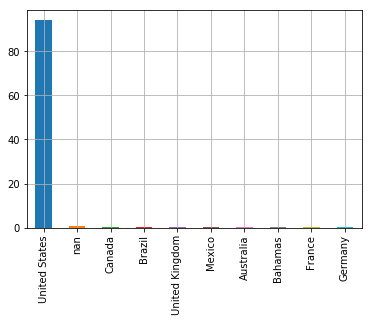

In [14]:
country_vals = df['Country'].value_counts(normalize=True, dropna=False)[:10]*100
country_vals.plot(kind="bar");
plt.grid()

More than 90% data are from the United States, followed by Canada, Brazil, United Kindown, and Mexico. Clearly data from the United States dominate. 

Now let's focus on these accident in the United States with at least one fatality, from data after Jan. 1982. (Data from before this month is not complete).

In [15]:
df['Date'] = pd.to_datetime(df['Event.Date'])
df.drop('Event.Date', axis=1, inplace=True)

df_fatal = df.loc[(df['Total.Fatal.Injuries']>0) &
           (df['Date']>='1982-01') &
           (df['Country'] == 'United States'),
            :]

#### 7. Numerical fields statistics

In [16]:
df_fatal.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       14010.000000          14010.000000            14010.000000   
mean            1.168166              2.036403                0.225839   
std             0.420731              5.172473                1.459165   
min             0.000000              1.000000                0.000000   
25%             1.000000              1.000000                0.000000   
50%             1.000000              1.000000                0.000000   
75%             1.000000              2.000000                0.000000   
max             4.000000            265.000000               81.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          14010.000000     14010.000000  
mean               0.132191         0.360600  
std                2.185801         6.763075  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         0.000000  
75%                0.000000         0.000000  
max              137.000000       334.000000

#### 8. Handel categorical variables

No need to code categorical variables since there's no maching learning modeling in this analysis

### Statistic Analysis

Define a useful function to make a bar plot:

In [24]:
def plot_value_counts_bar(series, 
                          title,
                          xlabel, 
                          ylabel,
                          topN=20, 
                          figsize=(8,6),):
    """
    count the number occurrence of each unique value (including NAN) for input variable "var".
 
    Parameters:
    series      : data series to make a plot on
    title (str) : figure title
    xlabel (str): figure x axis label
    ylabel (str): figure y axis label
    topN (int)  : number of top counts to plot
    figsize (tuple of two integers): figure size width x heigh, default (8,6)
    
    Returns:
    Make a bar plot
 
    """
    plt.figure(figsize=figsize)
    vals = series.value_counts(normalize=True, dropna=False)[:topN]*100
    vals.plot(kind="bar")
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Now with all the data preparation, we may try to answer the following questions:
#### Question 1. When is the most dangerous time during each flight phases?

Check the fatal accident and fatality rate during each flight phase

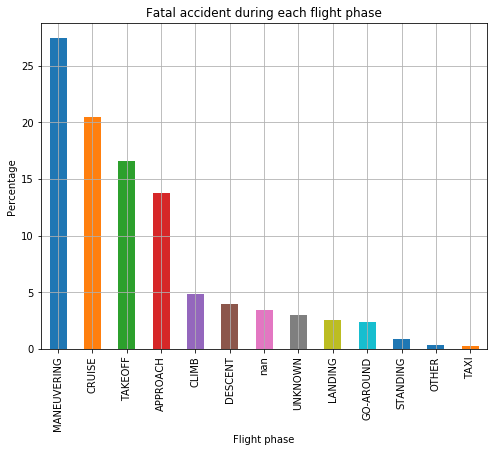

In [25]:
plot_value_counts_bar(series = df_fatal["Broad.Phase.of.Flight"], 
                      title  = "Fatal accident during each flight phase", 
                      xlabel = "Flight phase", 
                      ylabel = "Percentage" )

It turns out in the NTSB data, The most common phase during which fatal accidents happens are during maneuvering (26%), cruise (20%), takeoff (16%), and approach (14%). Maneuvering is the most dangerous flight phase.

#### Question 2: Is airplane more safe or less safe during the last few decades?
The year to year Fatality rate

In [19]:
fatal_agg = df_fatal['Total.Fatal.Injuries'].groupby([df_fatal['Date'].dt.year]).agg({'sum','count'})
fatal_agg

count     sum
Date               
1982    645  1557.0
1983    654  1259.0
1984    619  1198.0
1985    560  1346.0
1986    516  1157.0
1987    491  1192.0
1988    493   892.0
1989    479  1060.0
1990    499   944.0
1991    478  1033.0
1992    486   977.0
1993    426   805.0
1994    438  1064.0
1995    431   776.0
1996    382  1021.0
1997    371   946.0
1998    384   649.0
1999    352   661.0
2000    373   758.0
2001    351  1155.0
2002    363   604.0
2003    377   707.0
2004    350   636.0
2005    335   584.0
2006    323   626.0
2007    304   539.0
2008    289   553.0
2009    276   538.0
2010    271   460.0
2011    285   492.0
2012    274   413.0
2013    223   394.0
2014    259   406.0
2015    235   404.0
2016    217   401.0
2017    201   323.0

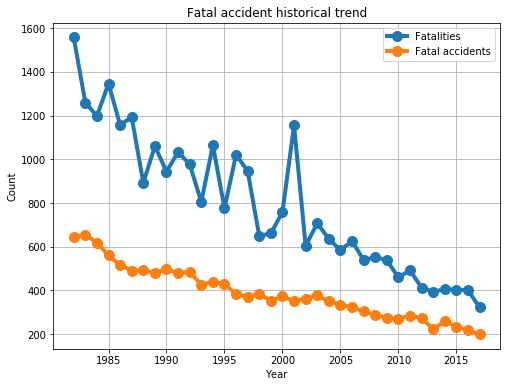

In [21]:
plt.figure(figsize=(8,6))
plt.plot(fatal_agg[['sum','count']], 'o-', lw=4, ms=10 )
plt.legend(('Fatalities', 'Fatal accidents'))
plt.title('Fatal accident historical trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()

By looking at the NTSB accident data during the last four decades, thereâ€™s a clear pattern of both less fatal accidents and less fatality, indicating the airplane is safer over the last 40 years.

The only unusually fatality spike was in 2001, which is the tragic historical 9/11 events with 4 airplanes crashed in one day.

### Question 3: Which airplane has the highest fatal accidents?

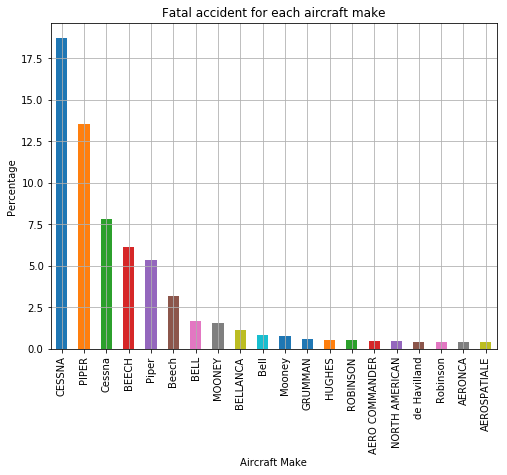

In [26]:
plot_value_counts_bar(series = df_fatal["Make"], 
                      title  = "Fatal accident for each aircraft make", 
                      xlabel = "Aircraft Make", 
                      ylabel = "Percentage")

There is issue here, "CESSNA" (all CAPITALIZED) and "Cessna" (Only first letter Capitalized) has been listed as two separate models, so is "PIPER" and "Piper". Let's combined them by change all of them to upper case.

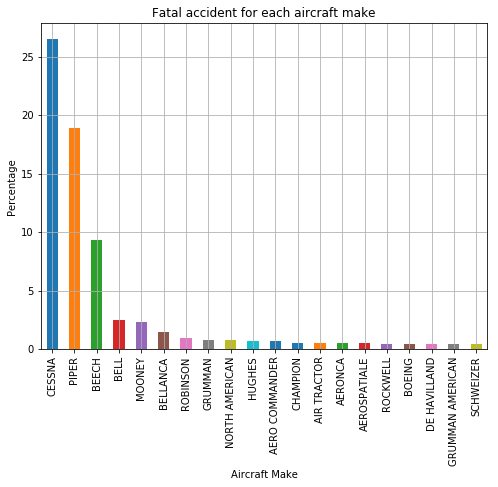

In [27]:
plot_value_counts_bar(series = df_fatal["Make"].str.upper(), 
                      title  = "Fatal accident for each aircraft make", 
                      xlabel = "Aircraft Make", 
                      ylabel = "Percentage")

About 26% fatal accidents from Cessna, another 19% from Piper. 9% from Beech. It is not a surprise since Cessna, Piper Aircraft, and Beechcraft were considered the "Big Three" in the field of general aviation manufacturing.

## Deployment

The audience can find the the result of this analysis in the following locations:  
- [Medium article](https://medium.com/@qiuxinjie/3-things-you-need-to-know-about-the-of-air-travel-safety-43cddf33cd23)
- [README on GitHub](https://github.com/tjphoton/Aviation-Safety)
- [Jupyter Notebook on GitHub](https://github.com/tjphoton/Aviation-Safety/blob/master/Aviation.ipynb)

## Conclusion

In this analysis, we took a look at the aviation safety is according to NTSB data.


1. Maneuvering, cruise, takeoff, and approach are the four most dangerous flight phases causing fatality.
2. Aviation fatal incident events are less and less over the years, aviation fatality rate is also declining, indicate the trend of air travel safety.
3. Cessna, Piper, Beech are the there most popular general aviation aircraft manufactures, making them the most fatality accident related aircraft models. But you should be less concerned about these general aviation aircraft models when you travel with airlines.
